In [16]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
wheat_data = pd.read_csv('../data/extra/Фьючерс на пшеницу США (USD).csv')

## EDA

In [3]:
wheat_data.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,08.11.2023,"586,60","571,50","598,62","570,12",NaN,"2,87%"
1,07.11.2023,"570,25","574,00","582,25","564,50","106,30K","-0,96%"
2,06.11.2023,"575,75","573,00","577,75","566,50","68,70K","0,57%"
3,03.11.2023,"572,50","565,75","574,50","563,75","41,97K","1,24%"
4,02.11.2023,"565,50","562,25","569,50","557,25","53,49K","0,67%"


In [4]:
wheat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Дата    2565 non-null   object
 1   Цена    2565 non-null   object
 2   Откр.   2565 non-null   object
 3   Макс.   2565 non-null   object
 4   Мин.    2565 non-null   object
 5   Объём   2204 non-null   object
 6   Изм. %  2565 non-null   object
dtypes: object(7)
memory usage: 140.4+ KB


In [26]:
def convert_types(dataset: pd.DataFrame):
    dataset['Дата'] = pd.to_datetime(dataset['Дата'], format='%d.%m.%Y')
    dataset['Цена'] = dataset['Цена'].apply(lambda x: (x[:-3].replace('.', '') + '.' + x[-2:]))
    
    dataset['Цена'] = dataset['Цена'].astype(np.float32)

    return dataset

In [27]:
wheat_data = convert_types(wheat_data)

TypeError: 'float' object is not subscriptable

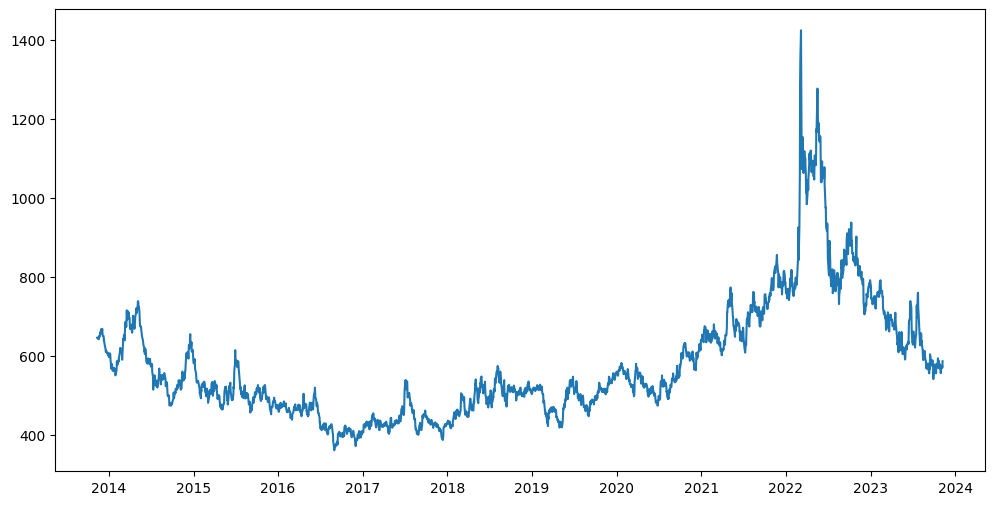

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(wheat_data['Дата'], wheat_data['Цена'])

## Run FEDOT

In [ ]:
model = Fedot(problem='classification', timeout=5, preset='best_quality', n_jobs=-1)
model.fit(features=x_train, target=y_train)
prediction = model.predict(features=x_test)
metrics = model.get_metrics(target=y_test)

In [31]:
X = wheat_data['Дата']
y = wheat_data['Цена']

In [42]:
X.shape

(2565,)

In [43]:
train_size = 2000

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]

In [46]:
from fedot.api.main import Fedot
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams
from fedot.core.data.data import Data
from fedot.core.repository.dataset_types import DataTypesEnum

In [45]:
task = Task(TaskTypesEnum.ts_forecasting, TsForecastingParams(forecast_length=500))

In [ ]:
input_data = Data.from_dataframe(
    features_df=y_train, 
    target_df=y_train,
    task=task,
)

In [ ]:
model = Fedot(problem='ts_forecasting', task_params=task.task_params)
chain = model.fit(features=train_data)